## Predicting Heart Disease using Machine Learning

###### ***By Ezekiel Adoh***




The goal of this notebook is to showcase foundational machine learning and data science concepts by exploring the problem of heart disease **classification**

For example, given a person's health characteristics, we're going to build a model to predict whether or not they have heart disease.

It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

|**Steps**|**What we'll cover**|
|-----|-----|
|**Exploratory data anaylsis (EDA)**|The processs of going through a dataset and discorvering more about it|
|**Model training**|Create model(s) to learn to predict a target variable based on other variables.|
|**Model evaluation**|Evaluating a model's predictions using problem-specific evaluation metrics.|
|**Model comparison**| Comparing several different models to find the best one.|
|**Model hyperparamter tuning**|Once we've found a good model, can we tweak its hyperparameters to improve it?|
|**Feature importance**|Since we're predicting the presence of heart disease, are there some features/characteristics that are more important for prediction?|
|**Cross-validation**|If we do build a good model, can we be sure it will work on unseen data|
|**Reporting what we've found**| If we had to present our work, what would we show someone?|



### Tools We'll Use

To work through these topics, we'll use:
* **Pandas**
* **Matplotlib**
* And **Numpy** for data analysis,

As well as: 
* **Scikit-Learn** for machine learning and modeling tasks.


#### 1. Problem Definition

In our case, the problem we'll be exploring is **binary classification** ( a sample can only be one of two things)

We are going to be using a number of different **features** (pieces of information such as health characteristics)about a person to predict whether they have heart disease or not

To Frame the problem:
> ***Given clinical parameters about a patient, can we predict whether or not they have heart disease?***

#### 1.2 Data


The original data came from the [Cleveland database](https://archive.ics.uci.edu/dataset/45/heart+disease) from UCI Machine learning Repository. 

However for this notebook we will be using the formatted version from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset)

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables that we'll use to predict our **target variable**.

#### Data Features

##### Heart Disease Data Dictionary
The following are the features we'll use to predict our target variable (heart disease or no heart disease)

|**Feature**|**Description**|**Example Values**|
|-----|-----|-----|
|**age**|Age in years|29, 45, 60|
|**sex**|1 = male; 0 = female| 0, 1|
|**cp**|Chest pain type|0: Typical angina(chest pain), 1: Atypical angina(chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms(non heart related), 3: Asymptomatic(chest pain not showing signs of disease)|
|**trestbps**|Resting blood pressure(in mm Hg on admission to the hospital)|120, 140, 150|
|**chol**|Serum cholesterol in mg/dl|180, 220, 250|
|**fbs**|Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)| 0, 1|
|**restecg**|Resting electrocardiographic results|0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy|
|**thalach**|Maximum heart rate achieved|160, 180, 190|
|**exang**|Exercise induced angina(1 = yes; 0 = no)|0, 1|
|**oldpeak**|ST depression (heart potentially not getting enough oyxygen)induced by exercise relative to rest|0.5, 1.0, 2.0|
|**slope**|The slope of the peak exercise ST segment|0: Unsloping, 1:Flatsloping, 2: Downsloping|
|**ca**|Number of major vessels (0-3) colored by fluoroscopy|0,1,2,3|
|**thal**|Thalium stress result|1:Normal, 3: Normal, 6: Fixed Defect, 7: Reversible defect|
|**target**|Have a disease or not(1 = yes; 0 = no)|0, 1|

#### 2. Preparing Tools
We mentioned this earlier but lets now start importing our required libraries.

The libraries that we will be usin in this notebook:
* **Pandas** for data analysis
* **Numpy** for numerical operations
* **Matplotlib/Seaborn** for plotting or data visualizations
* **Scikit-Learn** for machine learning modeling and evaluation

In [19]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of libraries we're using 
print(f"Numpy version:{np.__version__}")
print(f"Pandas version:{pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version:{sklearn.__version__}")

Notebook last updated: 2025-01-07 19:05:11.817277

Numpy version:1.26.4
Pandas version:2.2.1
Matplotlib version: 3.8.4
Scikit-Learn version:1.4.2


#### 3. Loading Data

In [21]:
# Import our data
df = pd.read_csv("heart-disease.csv")

df.shape # (rows, columns)

(303, 14)

In [24]:
# Check the head of our DataFrame
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### Data Exploration (exploratory data analysis or EDA)

Let's get a little more familar with our dataset.


In [25]:
# Lets see how many positive (1) and negative (0) samples we have in our DataFrame
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

> Since these two values are close to even, our `target` column can be considered **balanced**.

> An **unbalanced** target column, meaning some classes have far more samples, can be harder to model than balanced set.
if we want to see these vaues as percentages, `value_counts()` takes the parameter. `normalize` which can be set to *true*

In [27]:
# Normalized value counts
df["target"].value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

> let's plot our target column value counts

<Axes: xlabel='target'>

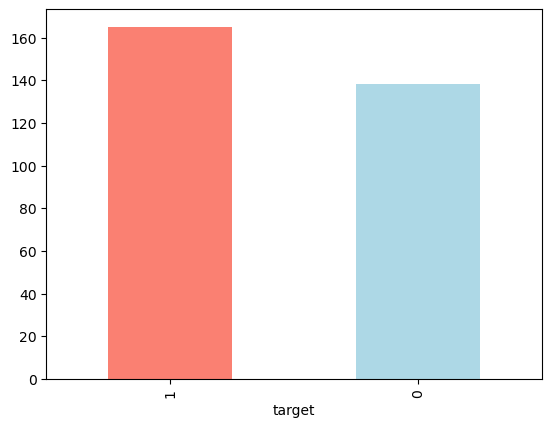

In [30]:
# Plot the value counts with a bar graph
df['target'].value_counts().plot(kind='bar', color=["salmon", "lightblue"])

> Let's now get a some info from our dataframe to see if we have any missing values and what type of data we're working with

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


in this case, there are no missing values and all of our columns are numerical in nature.

let's use the `describe()` method to give some numerical insight about the columns in our dataset

In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 4. Compare one feature to another
It is helpul to start getting an intuition about how our independent variables interact with our dependent variables.

For this reason we will use the function `pd.crosstab(index, columns)`

> Let's compare our target column with the sex column
> Remember from our data dictionary, for the **target** column, 1 = heart disease present, 0 = no heart disease.
> And for **sex**, 1 = male, 0 = female

In [33]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

> There are 207 males and 96 females in our study
> 
> Let's compare the target column values with the sex column values.

In [35]:
# Compare target column with sex column
pd.crosstab(index=df['target'], columns=df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


###### What can we infer from this?
Let's make a simple heuristic

Since there are about 100 women and 72 of them have a positive value for heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a ~72% (72/96 woman in our dataset are positve for heart disease)chance she has heart disease.

As for males, there's about 200 total with around half(93/207)indicating a presence of heart disease.

So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very simple **baseline**, we'll try to beat it with machine learning.

> **Note:** A baseline is a simple model or estimate you start with and try to beat/confirm throughout your exeprmiments. It can be as simple as looking at the dataset as we've done and creating a predictive heuristic to move forward.



#### 4.2 Visualize Our Comparisons

> Let's plot our `pd.crosstab()` table

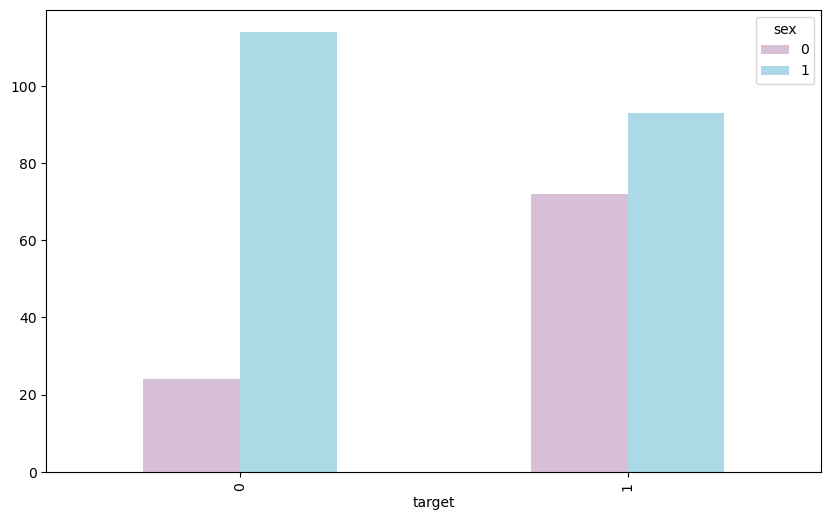

In [44]:
# Create plot
pd.crosstab(df['target'], df['sex']).plot(kind='bar',
                                          figsize=(10,6),
                                          color=["thistle", "lightblue"]);

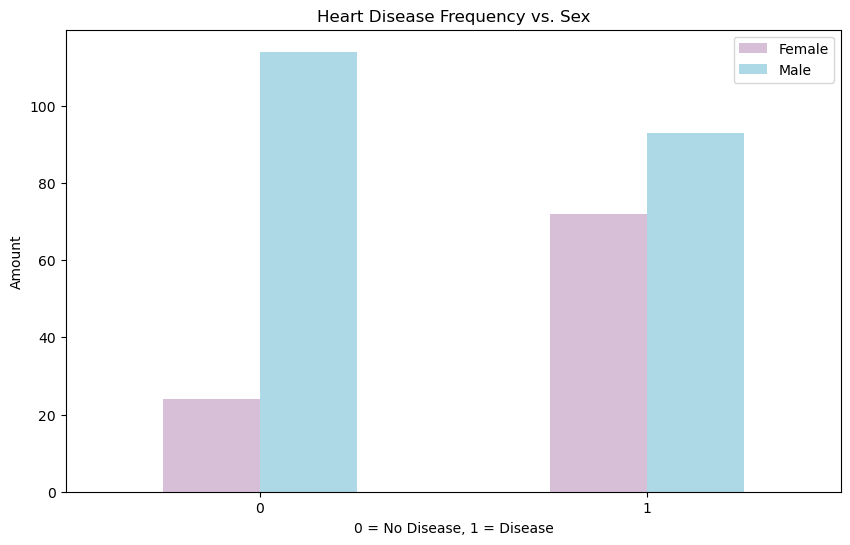

In [46]:
# Create a plot
pd.crosstab(df['target'], df['sex']).plot(kind='bar', 
                                         figsize=(10,6),
                                         color=['thistle', 'lightblue'])

# Add Title and attributes
plt.title("Heart Disease Frequency vs. Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

#### 4.3 Compare Independent Variables with another Independent Variable

Let's try combining a couple of independent variables, such as `age` and `thalach`(maximum heart rate) and then comparing them to our target variable `heart disease`.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot

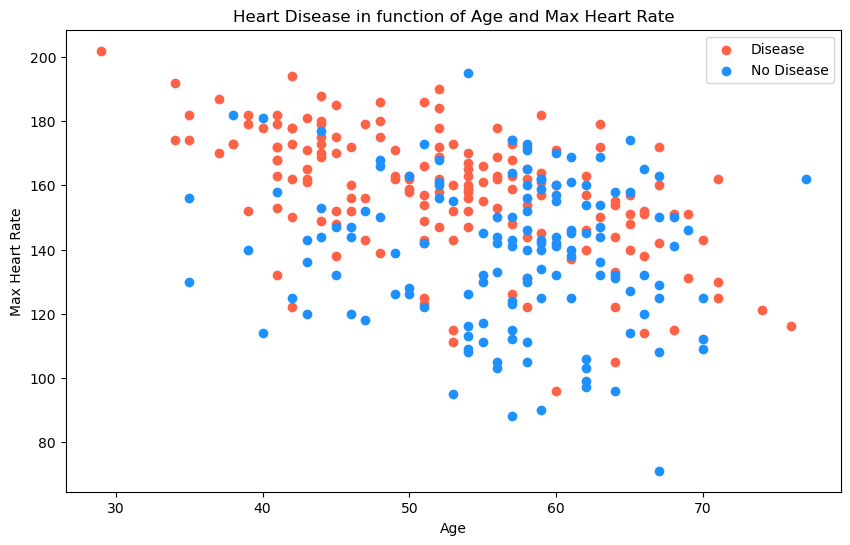

In [58]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positive examples
plt.scatter(df['age'][df['target']==1],
            df['thalach'][df['target']==1],
            c='tomato');

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df['age'][df['target']==0],
            df['thalach'][df['target']==0],
            c='dodgerblue')

# Add Title and Labels
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

> what can we gather from this?
> 
> It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) adn it seems there may be more heart disease in the younder population as well. (more red dots)
>
> Both of these are observational of course, but this what we're trying to do, build an understanding of the data.
>
> Let's check the `age` **distribution**.

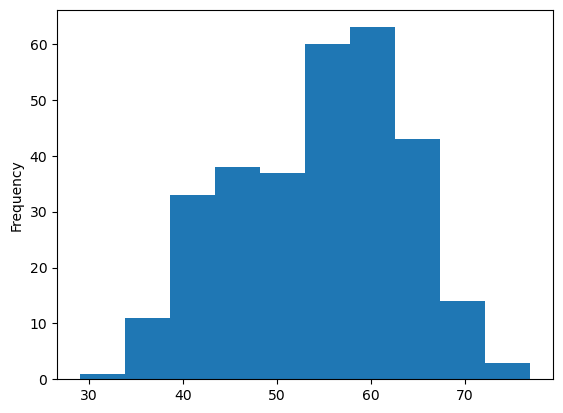

In [59]:
# Let's use a histogram to check to the distribution of the age variable
df['age'].plot.hist();

we can see it's **normal distribution** but slightly swaying to the right, which refelects in the scatter plot above.

Let's keep going

#### 4.4 Comparing Heart Disease Frequency and Chest Pain Type

Let's compare another independent variable with our target variable

This time, we'll use `cp`(chest pain) as the independent variable

We'll use the same process as we did before with `sex`

In [62]:
pd.crosstab(index=df['cp'], columns=df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


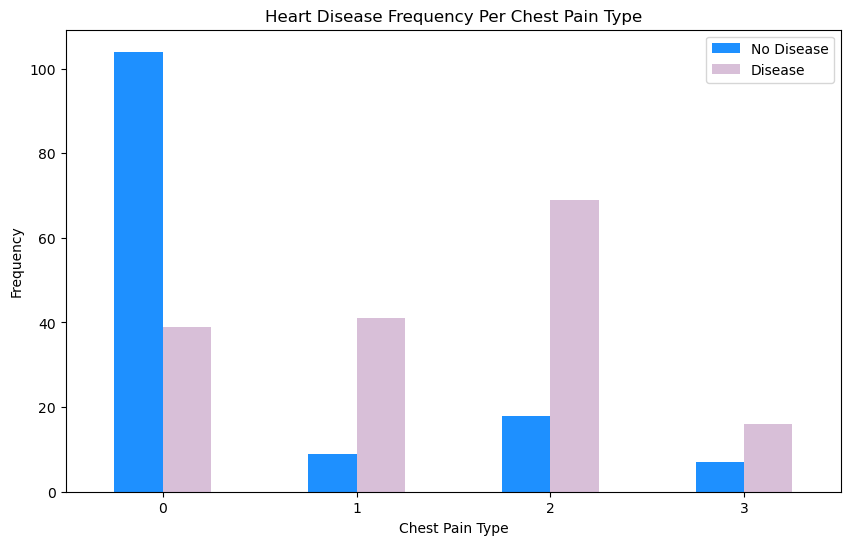

In [63]:
# Create a new crosstab and base plot
pd.crosstab(df['cp'], df['target']).plot(kind="bar",
                                         figsize=(10,6),
                                         color=["dodgerblue", "thistle"])

# Add Titles and labels to plot to make more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

What can we gather from this?

Remember from our data dictionary what the different levels of chest pain are:
|Feature|Description|Example Values|
|-----|-----|------|
|**cp**|Chest pain type|**0**: Typical angina(chest pain), **1**: Atypical angina(chest pain not related to heart), **2**: Non-anginal pain (typically esophageal spasms(non heart related), **3**: Asymptomatic(chest pain not showing signs of disease)|

It's interesting that atypical (value 1) states it's not related to the heart but it seems to have a higher ratio of participants with heart disease than not.

Seeing as our data dictionary doesnt supply us with enough information. We may have to do some more reasearch.

According to the PubMed, it seems [even some medical professionals are confused by the term](https://pmc.ncbi.nlm.nih.gov/articles/PMC2763472/).

> Today, 20 plus years later, "atpyical chest pain" is still popular in medical circles. Its meaning however, remains unclear. few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.
>
Although not conlusive, the plot above is a sign there may be confusion of definitions being represented in the data.








#### 4.5 Correlation between independent variables

Finally, we'll compare all of the independent variables.

This may give us an idea of which independent variables may or may not have an impact on our target variable.

we'll use the `pd.DataFram.corr()` which will create a **correlation matrix** for us

In [64]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

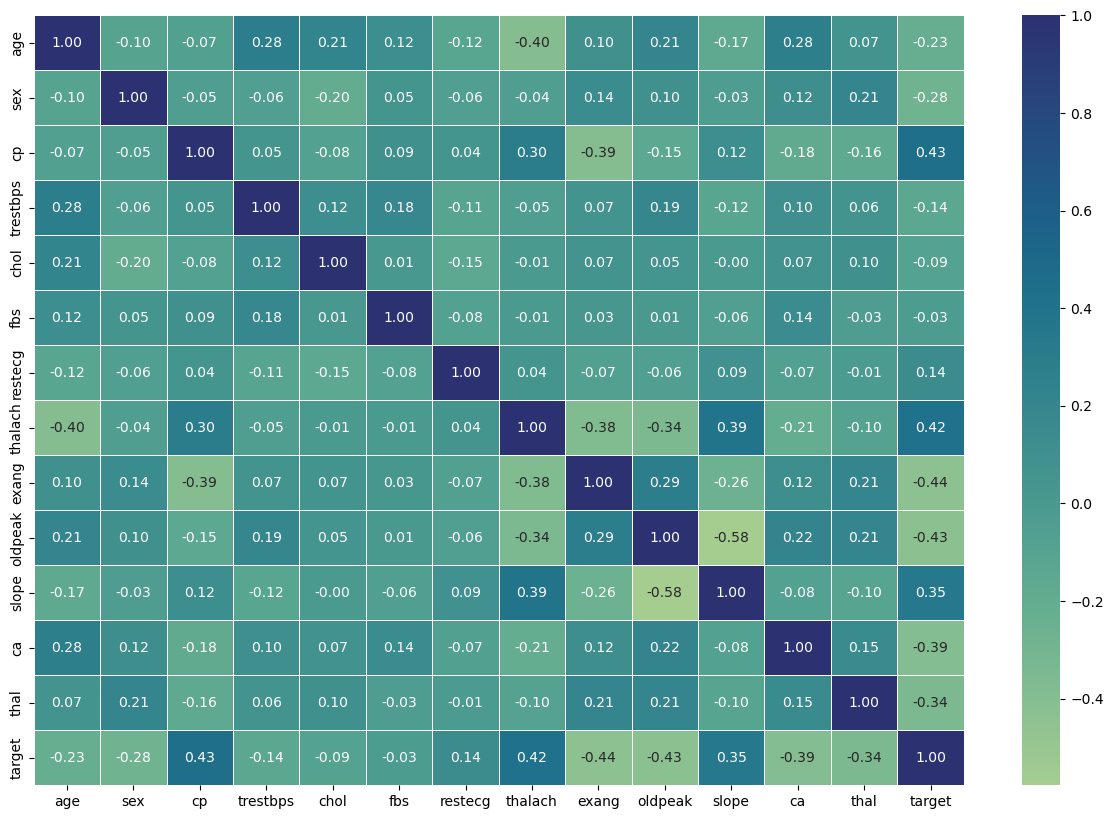

In [67]:
# Let's visualize the matrix

corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="crest")

We see that `cp`, `thalach`, and  `slope` have the highest correlations with our target values. 

#### 5. Modeling

we've explored the data, now we'll try to build a machine learning model to be able to predict our target variable based on the 13 independent variables.

Let's reflect back to the problem we are trying to solve.
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

And remember our evaluation metric?
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

Let's get our data ready

In [70]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


##### Splitting our Data into `X` and`y` 

In [72]:
# Split our data into X and y
X = df.drop("target", axis=1)
y = df["target"].to_numpy()

In [73]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [74]:
# Targets (in the form of Numpy array)
y , type(y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

##### Creating a training and test split

In [76]:
# Random seed for reproducibility

np.random.seed(42)

# Split into train & test set

X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variables
                                                    test_size=0.20) # percentage of data to use for test set
                                                   


> Let's look at our training data

In [77]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [80]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 242)

> Let's look at our test data

In [79]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [81]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 61)

We've got 61 examples we'll test our model(s) on 

##### Choosing a model

Now we've got our data prepared, we can start to fit models.

We'll start by trying the following models and comparing the results:

1. Logistic Regression - `sklearn.linear_model.LogisticRegression()`
2. K-Nearest Neighbors - `sklearn.neighbors.KNeighborsClassifier()`
3. RandomForest - `sklearn.ensemble.RandomForestClassifier()`

In [90]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
         "Logistic Regression": LogisticRegression(max_iter=10000),
         "RandomForest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_training: labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

> Let's see how our collection of models work on our data.

In [91]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'RandomForest': 0.8360655737704918}

##### Comparing the results of our models

<Axes: >

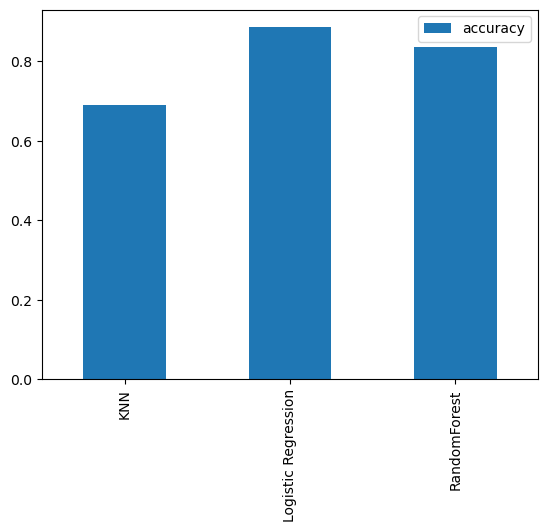

In [94]:
# Make a dataframe and plot the scores
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

From the plot it looks like `sklearn.linear_model.LogisticRegression()` model performs best.

#### Hyperparameter tuning and cross-validation

Here's the plan:
1. Tune model hyperparameters, and see which performs best
2. Perform cross-validation
3. Plot ROC curves 
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

##### Tune KnNeighborsClassifier(K-Nearest Neighbors or KNN) by hand

In [95]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values 
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value

    # Fit the algorithm
    knn.fit(X_train,y_train)

    # Update the training scores
    train_scores.append(knn.score(X_train,y_train))

    # Update the test scores
    test_scores.append(knn.score(X_test,y_test))

> Let's take a look at the `train_scores`

In [98]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

> Let's plot the score from our `train_score` and `test_score` list

Maximum KNN score on the test data: 75.41%


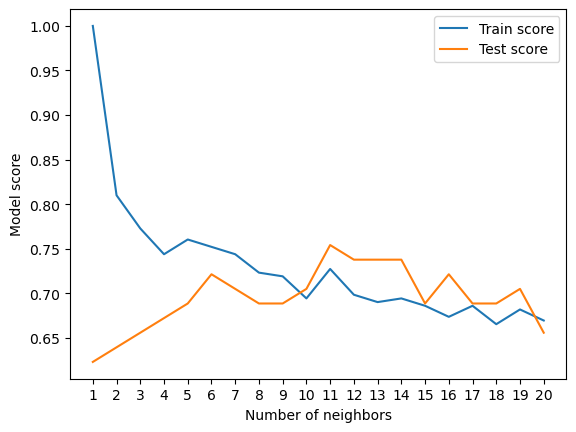

In [99]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, `n_neighbors = 11` seems best

Even knowing this, the `KNN`'s model performance didnt get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, we'll discard `KNN` and focus on the other two.

##### Tuning models with the `RandomizedSearchCV`
> Let's create a hyperparameter grid for each and then test them out.

In [101]:
# Different LogisticRegression hyperparameters

log_reg_grid = {"C": np.logspace(-4,4, 20),
                "solver":["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [110]:
%time
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# Fit random hyperparameter search model
rs_log_reg.fit(X_train,y_train);


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [107]:
# find out the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [108]:
# find the score for the best params
rs_log_reg.score(X_test, y_test)

0.8852459016393442

That seems on par with result we got before ***without*** any hyperparameter tuning.

> Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`

In [109]:
%time
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomSearchClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
# Fit random hyperparameter search model
rs_rf.fit(X_train,y_train);

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 12.6 µs
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [111]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [112]:
# Evaluate the randomized search forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

Nice! Tuning the hyperparameters for each model saw a slight performance boost in both the `RandomForestClassifier` and `LogisticRegression`.

> Since `LogisticRegression` is pulling out in front, we'll try tuning it further with `GridSearchCV`.

#### Tuning a model with `GridSearchCV`

In [114]:
%time

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [115]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [116]:
# Evaluate the model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combination

#### Evaluating a classification model

> Now we've got a tuned model, let's get some of the metrics we've discussed before
>
> To access them we'll have to use our models to make predictions on the test set.

In [117]:
# Make predictions on test data
y_preds = gs_log_reg.predict(X_test)

In [118]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [119]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

Now that we've got our prediction values we can find the metrics we want.

Lets start with the ROC curve and AUC scores

#### ROC Curve and AUC Scores
ROC Curve is a way of understanding how your model is performing by comparing the true positive rate to the false positve rate

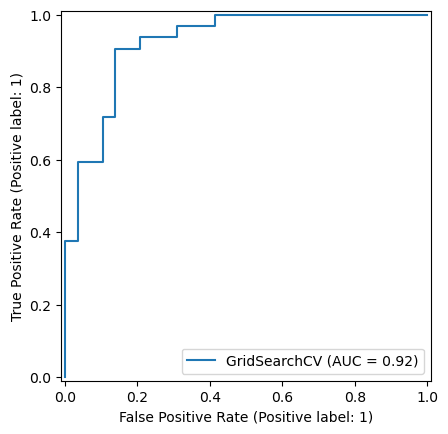

In [122]:
# Import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                              X=X_test,
                              y=y_test);


#### Create a confusion matrix

A Confusion matrix is a visual way to show where your model made the right predictions and where it made wrong predictions(or in other words, got confused)

In [124]:
# Display confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


> Lets create a heatmap to visualize the confusion  matrix

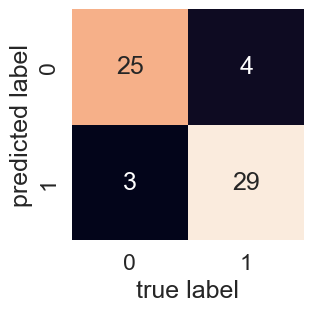

In [125]:
# Lets create a function that will plot our confusion matrix

# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) #Increase font size

def plot_conf_mat(y_test,y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True, #Annotate the boxes
                     cbar =False) 
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test,y_preds)

As we can see the model gets confused (predicts the wrong label) relatively the same across both classes.

In essence, there are 4 occasions where the model predicted 0 when it should've been 1(false negative) and 3 occasions where the model predicted 1 instead of 0 (false negative)

#### Classification Report

A classification report is a collection of different metrics and other details.

It will also give us information on the precision and recall of our model for each class.

In [126]:
# Show classification report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Cross Validation
> Let's now cross validate our model
>
> First let's take a look at the best hyperparameters

In [127]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [128]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instatiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                        solver='liblinear')

Now we've got an instantiated  classifier, let's find some cross-validated metrics

In [129]:
%time

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,# 5-fold cross-validation, this is the default
                        scoring="accuracy")
cv_acc

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs


array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

Since there are 5 metrics here, we'll take the average

In [148]:
# Take average of the cross validation score
cv_acc = np.mean(cv_acc)
print(f"Average Cross validated Accuracy: {cv_acc*100:2f}%")

Average Cross validated Accuracy: 84.797814%


>Now we'll do the same for the other classification metrics

In [146]:
# Cross-valiated precision score
cv_precision = np.mean(cross_val_score(clf,
                                      X,
                                      y,
                                      cv=5, # 5-fold cross-validation
                                      scoring="precision"))# precision as scoring
print(f"Average Cross validated Precision: {cv_precision*100:2f}%")

Average Cross validated Precision: 82.158730%


In [149]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                   X,
                                   y,
                                   cv=5,# 5-fold cross-validated
                                   scoring='recall'))
print(f"Average Cross validated Recall: {cv_recall*100:2f}%")

Average Cross validated Recall: 92.727273%


In [151]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                               X,
                               y,
                               cv=5,# 5-fold cross-validated
                               scoring="f1"))# f1 as scoring
print(f"Average Cross Validated F1 score: {cv_f1*100:2f}%")

Average Cross Validated F1 score: 87.054035%


>Now that we've got our cross validated metrics

>Lets visualize them

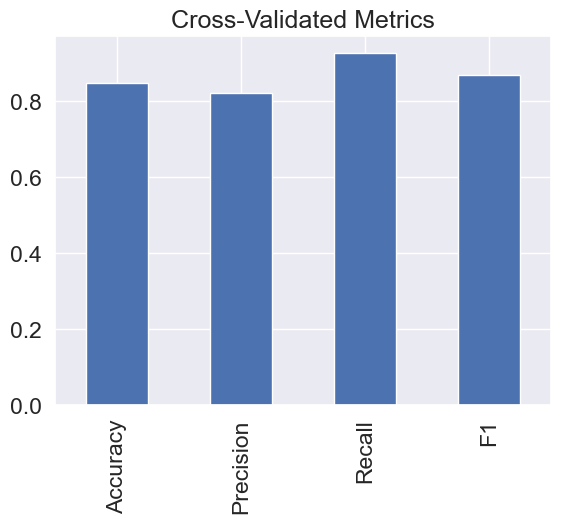

In [163]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

#### Feature Importance
Feature Importance is another way of asking, " Which features contribute most to the outcomes of the model?"

For our problem, trying to predict heart disease using a patients's medical characteristics, getting the feature importance is like asking "Which characteristics contribute most to a model predicting whether someone has heart disease or not?"

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression()`

In [164]:
# Fit an instance of LogisticRegression(taken from above)
clf.fit(X_train, y_train);

In [165]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

> Looking at this might not make much sense. But these values are how much each feature contributes to how a model makes decision on whether patterns in a sample of patients health data leans more towards having heart diseas or not

>Even knowing this, in it's current form , `coef_` array still doesnt mean much. But let's combine it with the columns(features)of our dataframe.

In [178]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

> Now that we've matched the feature coeffiecients to different features, let's visualize them

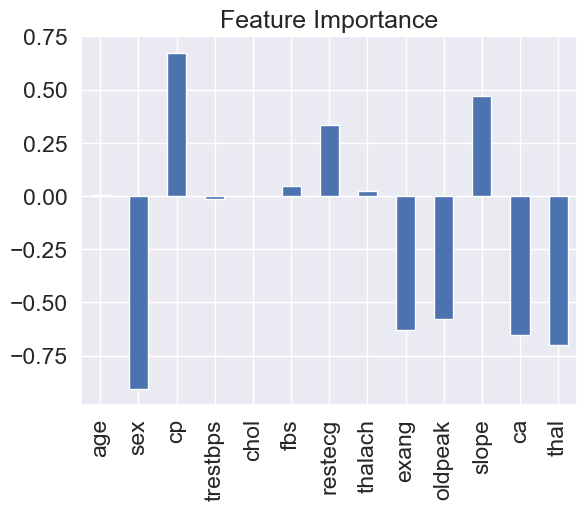

In [180]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);